# Ames房价数据集上房价预测

Ames房价预测是Kaggle平台上的一个竞赛任务，需要根据房屋的特征来预测亚美尼亚州洛瓦市（Ames，Lowa）的房价。其中房屋的特征x共有79维，响应值y为每个房屋的销售价格（SalePrice）。

Kaggle官网上的任务说明请见： https://www.kaggle.com/c/house-prices-advanced-regression-techniques
我的代码及数据在https://github.com/BlingW/scikit_learn/blob/master/

由于房屋的属性较多，且房屋属性类型各异，该数据集有些属性的缺失值也比较多，因此本任务的任务之一是在该数据集上练习特征工程技巧。
Kaggle平台上kernel区有各个竞赛参数者分享的代码，大家可以学习。 下面的代码也参考了很多不同选手分享的代码，在此一并致谢。
特征说明： SalesPrice：房屋售价（美元），这是要预测的目标变量。 MSSubClass：建筑类别,数据类型为整数，但实际上应该为类别型 MSZoning ：地区分类，类别型特征 LotFrontage：房屋到街道的直线距离（英尺） LotArea ：土地的大小（平方英尺） Street：所在道路的类型 Alley：所在巷通道的类型 LotShape ：房地产形状 LandContour：土地的平整性 Utilities：可用的工具 LotConfig：土地配置 LandSlope:财产的斜度 Neighborhood:市内的物理位置 Condition1: 靠近主干道或铁路 Condition2: 靠近主要道路或铁路（如果还有第二个） BldgType: 住宅类型 HouseStyle: 住宅风格 OverallQual: 整体材质和完成品质 OverallCond: 总体条件评级 YearBuilt: 最初建造日期 YearRemodAdd: 重建日期 RoofStyle: 屋顶类型 RoofMatl: 屋顶材料 Exterior1st: 房屋外墙 Exterior2nd: 房屋外墙 (如果多于一种材料) MasVnrType: 表层砌体（Masonry veneer）类型 MasVnrArea: 表层砌体面积（square feet） ExterQual: 外部材料的质量 ExterCond: 外部材料的现状 Foundation: 地基类型 BsmtQual: 地下室高度 BsmtCond: 地下室的总体状况 BsmtExposure: Walkout或花园层地下室的墙壁 BsmtFinType1: 完成的地下室的质量 BsmtFinSF1: 第一类型（Type 1）完成面积面积（square feet） BsmtFinType2: 第二类型完成面积(如果有) BsmtFinSF2: Type 2 完成面积（square feet） BsmtUnfSF: 未完成的地下室总面积（square feet） TotalBsmtSF: 地下室总面积（square feet） Heating: 取暖类型 HeatingQC: 取暖质量和条件 CentralAir: 中央空调 Electrical: 电气系统 1stFlrSF: 第一层的面积（square feet） 2ndFlrSF: 第二层的面积（square feet） LowQualFinSF:低质量完成的面积（square feet）（所有楼层） GrLivArea: 地上居住面积（square feet） BsmtFullBath: 地下室全浴室数目 BsmtHalfBath: 地下室半浴室数目 FullBath: 地上全浴室数 HalfBath: 地上半浴室数目 BedroomAbvGr: 地下室之上的卧室数目 KitchenAbvGr: 厨房数目 KitchenQual: 厨房质量 TotRmsAbvGrd: 地上房间总数(不包括浴室) Functional: 家用（Home）功能性评级 Fireplaces: 壁炉的数目 FireplaceQu: 壁炉质量 GarageType: 车库位置 GarageYrBlt: 车库建造年份 GarageFinish: I车库内部装修 GarageCars: 车库大小（能停的车辆数目） GarageArea: 车库大小（square feet） GarageQual: 车库质量 GarageCond: 车库条件 PavedDrive: 铺设的车道 WoodDeckSF: 木头deck面积（square feet） OpenPorchSF: 开放门廊面积（square feet） EnclosedPorch: 封闭门廊面积（square feet） 3SsnPorch: 三季门廊面积（square feet） ScreenPorch: 观景门廊（Screen porch）面积（square feet） PoolArea: 游泳池面积（square feet） PoolQC: 游泳池质量 Fence: 围栏质量 MiscFeature: 没被包含在其他类别的杂项功能 MiscVal: 杂项功能价值（$） MoSold: 销售月份 YrSold: 销售年份 SaleType: 销售类型 SaleCondition: 销售条件

In [1]:
# 因为我自己想尝试一下数据处理，就将数据处理、建模和预测写在一个ipynb里。
# 也作为一个笔记来记录
# 第一步导入需要的包

# pandas 是基于NumPy 的一种工具，Pandas 纳入了大量库和一些标准的数据模型，提供了高效地操作大型数据集所需的工具。
# 其数据结构：
#  Series：一维数组，与Numpy中的一维array类似。
# 二者与Python基本的数据结构List也很相近，其区别是：List中的元素可以是不同的数据类型，而Array和Series中则只允许存储相同的数据类型，这样可以更有效的使用内存，提高运算效率。
# Time- Series：以时间为索引的Series。
# DataFrame：二维的表格型数据结构。很多功能与R中的data.frame类似。可以将DataFrame理解为Series的容器。以下的内容主要以DataFrame为主。
# Panel ：三维的数组，可以理解为DataFrame的容器。
import pandas as pd
# NumPy系统是Python的一种开源的数值计算扩展。这种工具可用来存储和处理大型矩阵
import numpy as np

# 导入可视化库matplotlib.pyplot及seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# 我是在ipynb上写的代码所以需要配置一下IPython,使其可视化更方便
from IPython.display import display
pd.set_option('display.float_format', lambda x: '%.3f' % x)
% matplotlib inline

# 从CSV文件中读入训练数据，训练数据是含有y值的，在这个项目中即指的"房价字段"
trian_data_path = "data/Ames_House_train.csv"
# 将CSV中的数据写入到train中，train即为一个dataFrame
train = pd.read_csv(trian_data_path)
# dataFrame.head()函数可以查看前面5行(默认)的数据信息，也可以.head(n)来查看前n行数据
train.head()
# dataFrame.info()能查看frame中字段的总数、各个字段的个数、非空情况及数据类型（int,float,object）
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [2]:
# 同样将test数据写入到dataFrame:test参数中，此test数据为测试数据，不含预测值：SalePrice
test_data_path = "data/Ames_House_test.csv"
test = pd.read_csv(test_data_path)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [3]:
# 从上表，我们可以看到很多属性有缺失值， 一些属性可根据其含义设置为缺省值 一些属性缺可将该属性缺失作为一个新的取值 一些属性可以将其丢弃

# dataFrame.describe()作用是：
# 得到各属性的样本数目、均值、标准差、最小值、1/4分位数（25%）、中位数（50%）、3/4分位数（75%）、最大值 
# 可初步了解各特征的分布
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000,1460.000,1201.000,1460.000,1460.000,1460.000,1460.000,1460.000,1452.000,1460.000,...,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000
mean,730.500,56.897,70.050,10516.828,6.099,5.575,1971.268,1984.866,103.685,443.640,...,94.245,46.660,21.954,3.410,15.061,2.759,43.489,6.322,2007.816,180921.196
std,421.610,42.301,24.285,9981.265,1.383,1.113,30.203,20.645,181.066,456.098,...,125.339,66.256,61.119,29.317,55.757,40.177,496.123,2.704,1.328,79442.503
min,1.000,20.000,21.000,1300.000,1.000,1.000,1872.000,1950.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2006.000,34900.000
25%,365.750,20.000,59.000,7553.500,5.000,5.000,1954.000,1967.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,2007.000,129975.000
50%,730.500,50.000,69.000,9478.500,6.000,5.000,1973.000,1994.000,0.000,383.500,...,0.000,25.000,0.000,0.000,0.000,0.000,0.000,6.000,2008.000,163000.000
75%,1095.250,70.000,80.000,11601.500,7.000,6.000,2000.000,2004.000,166.000,712.250,...,168.000,68.000,0.000,0.000,0.000,0.000,0.000,8.000,2009.000,214000.000
max,1460.000,190.000,313.000,215245.000,10.000,9.000,2010.000,2010.000,1600.000,5644.000,...,857.000,547.000,552.000,508.000,480.000,738.000,15500.000,12.000,2010.000,755000.000


In [4]:
# 分析各自变量是否有空值
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

The shew of salePrice is : 1.88287575977


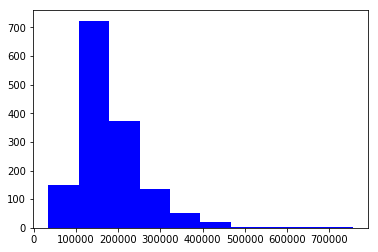

In [5]:
# 我们这次需要预测的目标变量为房屋出售价格SalePrice，现在分析SalePrice的信息
train.SalePrice.describe()
# 可能数字的统计不是很直观，我们也可以用plt的直方图分析一下SalePrice的分布
# 同时我们输出SalePrice的skew
# shew:数据偏斜度（skewness），以此来衡量数据分布的形状
print("The shew of salePrice is :", train.SalePrice.skew())
# 初始化figure
plt.figure()
# 画直方图可以用两种方法，一种是plt.hist，一种是用seaborn的sns.displot
# sns的用法（第三个参数是是否画出近似曲线）：
# sns.displot(train.SalePrice.values, bins=30, kde=True)
# plt的用法：
plt.hist(train.SalePrice, color='blue')
plt.show()

The shew of salePrice after log is : 0.121335062205


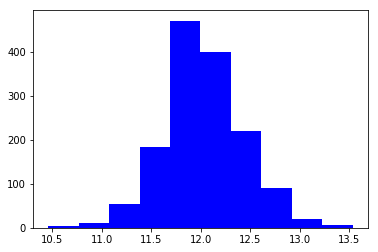

In [6]:
# 可以看到分布右侧有较长的尾部。这个分布是正向偏差。
# 如果目标变量出现偏斜，则有必要对目标变量进行对数变换（log-transform）。通过对数变换，可以改善数据的线性度。
# 现在应用np.log()对train.SalePric进行变换，然后重新计算偏斜率，并重新画图。通过变换，斜率更靠近0值，分布更接近正态分布。
# 重要的是，由最终模型生成的预测数据也要经过对数变换，这样便可将预测结果转换为原始形式。np.log()对数据进行变换，np.exp()进行逆变换。
sale_price_log = np.log(train.SalePrice)
print("The shew of salePrice after log is :", sale_price_log.skew())
plt.hist(sale_price_log, color='blue')
plt.show()

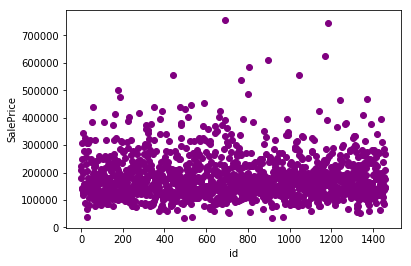

In [7]:
# 可以看到经过Log处理后已经接近正态分布，斜率跟接近0值
# 除了直方图，我们还能使用散点图来分析单个变量，散点图用plt.scatter()制作
# plt.scatter()函数第一个变量为横坐标，第二个变量为纵坐标，第三个变量为颜色
# 此处train.shape返回了train这个dataframe的行数和列数，行数及样本数，列数及参数维度（包含目标变量）
plt.scatter(range(train.shape[0]), train.SalePrice, color='purple')
plt.xlabel('id')
plt.ylabel('SalePrice')
plt.show()

In [8]:
# 单一分析了int型的目标变量，现在来分析一下各个object型（即变量的value不为数字）的自变量的特征
# select_dtypes()方法返回与给定数据类型匹配的列的集合
# .columns返回每列的名称
categorical_features = train.select_dtypes(include = ["object"]).columns
for col in categorical_features:
    print('\n%s属性的不同取值和出现的次数'%col)
    print(train[col].value_counts())


MSZoning属性的不同取值和出现的次数
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Street属性的不同取值和出现的次数
Pave    1454
Grvl       6
Name: Street, dtype: int64

Alley属性的不同取值和出现的次数
Grvl    50
Pave    41
Name: Alley, dtype: int64

LotShape属性的不同取值和出现的次数
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

LandContour属性的不同取值和出现的次数
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

Utilities属性的不同取值和出现的次数
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

LotConfig属性的不同取值和出现的次数
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

LandSlope属性的不同取值和出现的次数
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

Neighborhood属性的不同取值和出现的次数
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel  

In [9]:
# 单个变量探索得差不多了，我们现在看看特征与目标变量之间的关系
# 其中ID这个参数与房价肯定无关，所以我们需要去除ID这个参数
train.drop(['Id'], inplace = True, axis = 1)
#将测试数据的ID取出存放，后面会将其联合回去
test_id = test['Id']
test.drop(['Id'], inplace = True, axis = 1)
# DataFrame.corr()方法可以给出两个列之间的相关性，我们就借此方法去检测。注：此方法只能用于计算数字型特征之间的相关性
int_features = train.select_dtypes(exclude = ["object"])
corr = int_features.corr()
# 打印出各个特征与SalePrice的相关性，正序排列
print(corr.SalePrice.sort_values(ascending=False))

SalePrice        1.000
OverallQual      0.791
GrLivArea        0.709
GarageCars       0.640
GarageArea       0.623
TotalBsmtSF      0.614
1stFlrSF         0.606
FullBath         0.561
TotRmsAbvGrd     0.534
YearBuilt        0.523
YearRemodAdd     0.507
GarageYrBlt      0.486
MasVnrArea       0.477
Fireplaces       0.467
BsmtFinSF1       0.386
LotFrontage      0.352
WoodDeckSF       0.324
2ndFlrSF         0.319
OpenPorchSF      0.316
HalfBath         0.284
LotArea          0.264
BsmtFullBath     0.227
BsmtUnfSF        0.214
BedroomAbvGr     0.168
ScreenPorch      0.111
PoolArea         0.092
MoSold           0.046
3SsnPorch        0.045
BsmtFinSF2      -0.011
BsmtHalfBath    -0.017
MiscVal         -0.021
LowQualFinSF    -0.026
YrSold          -0.029
OverallCond     -0.078
MSSubClass      -0.084
EnclosedPorch   -0.129
KitchenAbvGr    -0.136
Name: SalePrice, dtype: float64


In [10]:
# 可以发现有的特征与房价正相关，有的特征跟房价负相关，其中OverallQual（房屋整体质量）与SalePrice正相关性最强
# 下面来研究一下OverallQual，先看下OverallQual存在哪些值，用unique()函数来去除重复的值
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

In [11]:
# 我们使用plt.pivot_table()数据透视表(pivot table)方法来分析，其中，SalePrice去对应的中位数，即aggfunc=np.median
# 此overall_qual_pivot为一个Series类型
overall_qual_pivot = train.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)
overall_qual_pivot

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


<function matplotlib.pyplot.show>

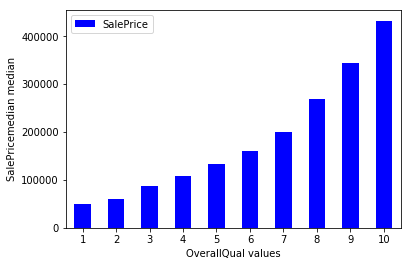

In [12]:
# 我们同样可以通过Series.plot（）方法创建一个条形图，使其更可视化
overall_qual_pivot.plot(kind='bar', color='blue')
plt.xlabel('OverallQual values')
plt.ylabel('SalePricemedian median')
plt.xticks(rotation=0)
plt.show

<function matplotlib.pyplot.show>

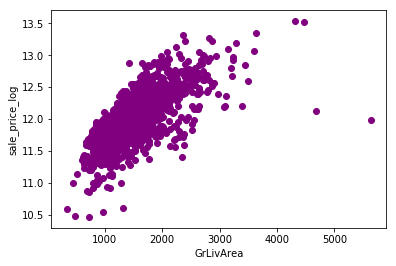

In [13]:
# 透过上图可以看出销售价格的中位数随着数量的增加而增加，不过这是OverallQual的值较少，只有十种值。
# 如果特征值的值更加分散，那我们就无法用hist来可视化了，所以我们可以运用散点图。如GrLivArea，数值非常分散。
# 接下来应用plt.scatter()生成散点图，对居住面积GrLivArea和SalePrice的关系进行可视化分析。
plt.scatter(train.GrLivArea, sale_price_log, color='purple')
plt.xlabel("GrLivArea")
plt.ylabel("sale_price_log")
plt.show

<function matplotlib.pyplot.show>

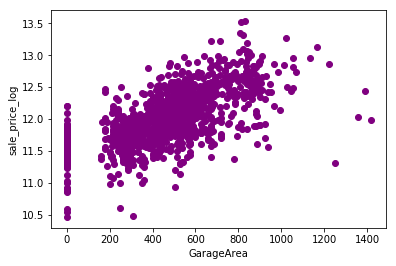

In [14]:
# 对GarageArea做同样的分析
plt.scatter(train.GarageArea, sale_price_log, color='purple')
plt.xlabel("GarageArea")
plt.ylabel("sale_price_log")
plt.show

<function matplotlib.pyplot.show>

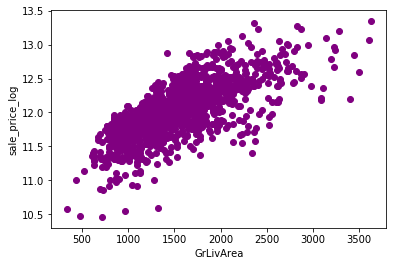

In [15]:
# 图中显示存在一些奇异值，这些奇异值会使预测回归线远离真实的回归线，进而影响回归模型。为保证回归模型的准确性，我们需要剔除这些奇异值。
# 所以我们删除GrLivArea大于4000的点
train = train[train.GrLivArea < 4000]
# 重新排列序号
train.reindex()
# 重新计算 sale_price_log,因为数据量产生了变化
sale_price_log = np.log(train.SalePrice)
# 然后我们再进行画图
plt.scatter(train.GrLivArea, sale_price_log, color='purple')
plt.xlabel("GrLivArea")
plt.ylabel("sale_price_log")
plt.show

<function matplotlib.pyplot.show>

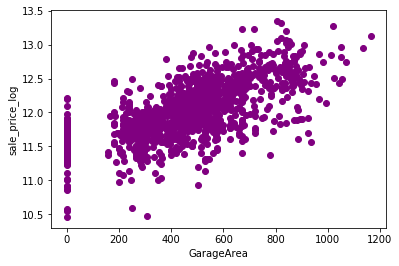

In [16]:
# 用同样的方法处理GrLivArea
# 可以看出许多房屋的GarageArea是0，表明这些房屋没有配备车库，稍后我们会利用其他特征反映这个猜测。
train = train[train.GarageArea < 1200]
# 重新排列序号
train.reindex()
# 重新计算 sale_price_log,因为数据量产生了变化
sale_price_log = np.log(train.SalePrice)
# 然后我们再进行画图
plt.scatter(train.GarageArea, sale_price_log, color='purple')
plt.xlabel("GarageArea")
plt.ylabel("sale_price_log")
plt.show

In [17]:
# 去除了离群点，我们还要对缺失值进行补充
# 特征的值为数字的是较为好填充的，可以选择median或者mean或most common value来填充。
# 而特征值不为数字的，我们需要特殊分析去判断并且填充
# 因为特征工程对训练集和测试都需要进行，因此我们定义成函数，将数据集以参数形式传递
def process_missvalue_by_meaning(df):
    # dataframe.loc:通过行的标签索引行数据
    # 扩展：df.loc[:, "Alley"] 及索引Alley这一列的所以行数据
    # dataframe.iloc:通过行的行号索引行数据
    # 详细分析 http://blog.csdn.net/xw_classmate/article/details/51333646
    
    # Alley : data description says NA means "no alley access"
    df.loc[:, "Alley"] = df.loc[:, "Alley"].fillna("None")

    # BedroomAbvGr : NA most likely means 0
    df.loc[:, "BedroomAbvGr"] = df.loc[:, "BedroomAbvGr"].fillna(0)

    # BsmtQual etc : data description says NA for basement features is "no basement"
    df.loc[:, "BsmtQual"] = df.loc[:, "BsmtQual"].fillna("No")
    df.loc[:, "BsmtCond"] = df.loc[:, "BsmtCond"].fillna("No")
    df.loc[:, "BsmtExposure"] = df.loc[:, "BsmtExposure"].fillna("No")
    df.loc[:, "BsmtFinType1"] = df.loc[:, "BsmtFinType1"].fillna("No")
    df.loc[:, "BsmtFinType2"] = df.loc[:, "BsmtFinType2"].fillna("No")
    df.loc[:, "BsmtFullBath"] = df.loc[:, "BsmtFullBath"].fillna(0)
    df.loc[:, "BsmtHalfBath"] = df.loc[:, "BsmtHalfBath"].fillna(0)
    df.loc[:, "BsmtUnfSF"] = df.loc[:, "BsmtUnfSF"].fillna(0)

    # CentralAir : NA most likely means No
    df.loc[:, "CentralAir"] = df.loc[:, "CentralAir"].fillna("N")

    # Condition : NA most likely means Normal，靠近主干道或铁路
    df.loc[:, "Condition1"] = df.loc[:, "Condition1"].fillna("Norm")
    df.loc[:, "Condition2"] = df.loc[:, "Condition2"].fillna("Norm")

    # EnclosedPorch : NA most likely means no enclosed porch
    df.loc[:, "EnclosedPorch"] = df.loc[:, "EnclosedPorch"].fillna(0)

    # External stuff : NA most likely means average
    df.loc[:, "ExterCond"] = df.loc[:, "ExterCond"].fillna("TA")
    df.loc[:, "ExterQual"] = df.loc[:, "ExterQual"].fillna("TA")

    # Fence : data description says NA means "no fence"
    df.loc[:, "Fence"] = df.loc[:, "Fence"].fillna("No")

    # FireplaceQu : data description says NA means "no fireplace"
    df.loc[:, "FireplaceQu"] = df.loc[:, "FireplaceQu"].fillna("No")
    df.loc[:, "Fireplaces"] = df.loc[:, "Fireplaces"].fillna(0)

    # Functional : data description says NA means typical，家用（Home）功能性评级
    df.loc[:, "Functional"] = df.loc[:, "Functional"].fillna("Typ")

    # GarageType etc : data description says NA for garage features is "no garage"
    df.loc[:, "GarageType"] = df.loc[:, "GarageType"].fillna("No")
    df.loc[:, "GarageFinish"] = df.loc[:, "GarageFinish"].fillna("No")
    df.loc[:, "GarageQual"] = df.loc[:, "GarageQual"].fillna("No")
    df.loc[:, "GarageCond"] = df.loc[:, "GarageCond"].fillna("No")
    df.loc[:, "GarageArea"] = df.loc[:, "GarageArea"].fillna(0)
    df.loc[:, "GarageCars"] = df.loc[:, "GarageCars"].fillna(0)

    # HalfBath : NA most likely means no half baths above grade
    df.loc[:, "HalfBath"] = df.loc[:, "HalfBath"].fillna(0)

    # HeatingQC : NA most likely means typical
    df.loc[:, "HeatingQC"] = df.loc[:, "HeatingQC"].fillna("TA")

    # KitchenAbvGr : NA most likely means 0
    df.loc[:, "KitchenAbvGr"] = df.loc[:, "KitchenAbvGr"].fillna(0)

    # KitchenQual : NA most likely means typical
    df.loc[:, "KitchenQual"] = df.loc[:, "KitchenQual"].fillna("TA")

    # LotFrontage : NA most likely means no lot frontage
    df.loc[:, "LotFrontage"] = df.loc[:, "LotFrontage"].fillna(0)

    # LotShape : NA most likely means regular
    df.loc[:, "LotShape"] = df.loc[:, "LotShape"].fillna("Reg")

    # MasVnrType : NA most likely means no veneer，表层砌体（Masonry veneer）类型
    df.loc[:, "MasVnrType"] = df.loc[:, "MasVnrType"].fillna("None")
    df.loc[:, "MasVnrArea"] = df.loc[:, "MasVnrArea"].fillna(0)

    # MiscFeature : data description says NA means "no misc feature"
    df.loc[:, "MiscFeature"] = df.loc[:, "MiscFeature"].fillna("No")
    df.loc[:, "MiscVal"] = df.loc[:, "MiscVal"].fillna(0)

    # OpenPorchSF : NA most likely means no open porch
    df.loc[:, "OpenPorchSF"] = df.loc[:, "OpenPorchSF"].fillna(0)

    # PavedDrive : NA most likely means not paved
    df.loc[:, "PavedDrive"] = df.loc[:, "PavedDrive"].fillna("N")

    # PoolQC : data description says NA means "no pool"
    df.loc[:, "PoolQC"] = df.loc[:, "PoolQC"].fillna("No")
    df.loc[:, "PoolArea"] = df.loc[:, "PoolArea"].fillna(0)

    # SaleCondition : NA most likely means normal sale
    df.loc[:, "SaleCondition"] = df.loc[:, "SaleCondition"].fillna("Normal")

    # ScreenPorch : NA most likely means no screen porch，观景门廊
    df.loc[:, "ScreenPorch"] = df.loc[:, "ScreenPorch"].fillna(0)

    # TotRmsAbvGrd : NA most likely means 0
    df.loc[:, "TotRmsAbvGrd"] = df.loc[:, "TotRmsAbvGrd"].fillna(0)

    # Utilities : NA most likely means all public utilities
    df.loc[:, "Utilities"] = df.loc[:, "Utilities"].fillna("AllPub")

    # WoodDeckSF : NA most likely means no wood deck
    df.loc[:, "WoodDeckSF"] = df.loc[:, "WoodDeckSF"].fillna(0)

    return df

train = process_missvalue_by_meaning(train)
test = process_missvalue_by_meaning(test)

In [18]:
# 一些数字类型的特征实际上并不是数字，而是一种标量，如MoSold=1实际上是一月的意思，这种数据需要转换为object
# MSSubClass：建筑类
# MoSold：销售月份

def numberical2cat(df):
    df.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      }, inplace = True)

    return df
train = numberical2cat(train)
test = numberical2cat(test)

In [19]:
# 一些特征是object但是是为了分级，当有顺序信息时，将某些分类特征编码为有序数字。
def cat2numberical(df):
    df.replace({"Alley" : {"None":0, "Grvl" : 1, "Pave" : 2},
                "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                "Street" : {"Grvl" : 1, "Pave" : 2},
                "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}},
                       inplace = True
                     )
    return df

train = cat2numberical(train)
test = cat2numberical(test)

In [20]:
# 还可以通过以下方式创建一些新特征 :
# 1.简化已有特征
# 2.联合已有特征
# 3.现有重要特征（top 10）的多项式

# 1 简化已有特征
# 合并类别
def simplify(df):
    df["SimplOverallQual"] = df.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                    4 : 2, 5 : 2, 6 : 2, # average
                                                    7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                    }, inplace = True)
    df["SimplOverallCond"] = df.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                    4 : 2, 5 : 2, 6 : 2, # average
                                                    7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                    },inplace = True)
    df["SimplPoolQC"] = df.PoolQC.replace({1 : 1, 2 : 1, # average
                                           3 : 2, 4 : 2 # good
                                          },inplace = True)
    df["SimplGarageCond"] = df.GarageCond.replace({1 : 1, # bad
                                                2 : 1, 3 : 1, # average
                                                4 : 2, 5 : 2 # good
                                                        },inplace = True)
    df["SimplGarageQual"] = df.GarageQual.replace({1 : 1, # bad
                                                    2 : 1, 3 : 1, # average
                                                    4 : 2, 5 : 2 # good
                                                    },inplace = True)
    df["SimplFireplaceQu"] = df.FireplaceQu.replace({1 : 1, # bad
                                                           2 : 1, 3 : 1, # average
                                                           4 : 2, 5 : 2 # good
                                                          },inplace = True)
    df["SimplFireplaceQu"] = df.FireplaceQu.replace({1 : 1, # bad
                                                           2 : 1, 3 : 1, # average
                                                           4 : 2, 5 : 2 # good
                                                          },inplace = True)
    df["SimplFunctional"] = df.Functional.replace({1 : 1, 2 : 1, # bad
                                                         3 : 2, 4 : 2, # major
                                                         5 : 3, 6 : 3, 7 : 3, # minor
                                                         8 : 4 # typical
                                                        },inplace = True)
    df["SimplKitchenQual"] = df.KitchenQual.replace({1 : 1, # bad
                                                           2 : 1, 3 : 1, # average
                                                           4 : 2, 5 : 2 # good
                                                          },inplace = True)
    df["SimplHeatingQC"] = df.HeatingQC.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      },inplace = True)
    df["SimplBsmtFinType1"] = df.BsmtFinType1.replace({1 : 1, # unfinished
                                                             2 : 1, 3 : 1, # rec room
                                                             4 : 2, 5 : 2, 6 : 2 # living quarters
                                                            },inplace = True)
    df["SimplBsmtFinType2"] = df.BsmtFinType2.replace({1 : 1, # unfinished
                                                             2 : 1, 3 : 1, # rec room
                                                             4 : 2, 5 : 2, 6 : 2 # living quarters
                                                            },inplace = True)
    df["SimplBsmtCond"] = df.BsmtCond.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    },inplace = True)
    df["SimplBsmtQual"] = df.BsmtQual.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    },inplace = True)
    df["SimplExterCond"] = df.ExterCond.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      },inplace = True)
    df["SimplExterQual"] = df.ExterQual.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      },inplace = True)
    return df

train = simplify(train)
test = simplify(test)

In [21]:
# 2 联合已有特征
def Combine(df):
    # Overall quality of the house
    df["OverallGrade"] = df["OverallQual"] * df["OverallCond"]
    # Overall quality of the garage
    df["GarageGrade"] = df["GarageQual"] * df["GarageCond"]
    # Overall quality of the exterior
    df["ExterGrade"] = df["ExterQual"] * df["ExterCond"]
    # Overall kitchen score
    df["KitchenScore"] = df["KitchenAbvGr"] * df["KitchenQual"]
    # Overall fireplace score
    df["FireplaceScore"] = df["Fireplaces"] * df["FireplaceQu"]
    # Overall garage score
    df["GarageScore"] = df["GarageArea"] * df["GarageQual"]
    # Overall pool score
    df["PoolScore"] = df["PoolArea"] * df["PoolQC"]
    # Simplified overall quality of the house
    df["SimplOverallGrade"] = df["SimplOverallQual"] * df["SimplOverallCond"]
    # Simplified overall quality of the exterior
    df["SimplExterGrade"] = df["SimplExterQual"] * df["SimplExterCond"]
    # Simplified overall pool score
    df["SimplPoolScore"] = df["PoolArea"] * df["SimplPoolQC"]
    # Simplified overall garage score
    df["SimplGarageScore"] = df["GarageArea"] * df["SimplGarageQual"]
    # Simplified overall fireplace score
    df["SimplFireplaceScore"] = df["Fireplaces"] * df["SimplFireplaceQu"]
    # Simplified overall kitchen score
    df["SimplKitchenScore"] = df["KitchenAbvGr"] * df["SimplKitchenQual"]
    # Total number of bathrooms
    df["TotalBath"] = df["BsmtFullBath"] + (0.5 * df["BsmtHalfBath"]) + \
    df["FullBath"] + (0.5 * df["HalfBath"])
    # Total SF for house (incl. basement)
    df["AllSF"] = df["GrLivArea"] + df["TotalBsmtSF"]
    # Total SF for 1st + 2nd floors
    df["AllFlrsSF"] = df["1stFlrSF"] + df["2ndFlrSF"]
    # Total SF for porch
    df["AllPorchSF"] = df["OpenPorchSF"] + df["EnclosedPorch"] + \
    df["3SsnPorch"] + df["ScreenPorch"]
    # Has masonry veneer or not
    df["HasMasVnr"] = df.MasVnrType.replace({"BrkCmn" : 1, "BrkFace" : 1, "CBlock" : 1, 
                                                   "Stone" : 1, "None" : 0})
    # House completed before sale or not
    df["BoughtOffPlan"] = df.SaleCondition.replace({"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, 
                                                          "Family" : 0, "Normal" : 0, "Partial" : 1})
    
    return df

# 对训练集和测试集分别进行编码
train = Combine(train)
test = Combine(test)

In [22]:
# 寻找最重要的特征值
print("Find most important features relative to target")

# DataFrame.corr()方法可以给出两个列之间的相关性，之前已给出用法
corr = train.corr()
# 也有另外一种写法: corr.SalePrice.sort_values(ascending=False)
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

# 用Series.iloc[]对行数进行索引，将于SalePrice第11相关性的相关值赋给threshold
threshold = corr.SalePrice.iloc[11]
print(threshold)
# 如果相关值大于threshold的特征自然就是TOP10的特征值了
# 关于axes,官方文档解释：Return a list of the row axis labels，即：返回行轴标签的列表
top10_cols = (corr.SalePrice[corr['SalePrice']>threshold]).axes
print(top10_cols)

Find most important features relative to target
SalePrice         1.000
AllSF             0.821
AllFlrsSF         0.729
GrLivArea         0.720
OverallQual       0.675
GarageCars        0.653
GarageArea        0.647
TotalBsmtSF       0.645
TotalBath         0.635
ExterQual         0.626
GarageScore       0.624
1stFlrSF          0.624
KitchenQual       0.582
FullBath          0.559
BsmtQual          0.544
TotRmsAbvGrd      0.538
YearBuilt         0.534
YearRemodAdd      0.520
KitchenScore      0.500
GarageYrBlt       0.499
OverallGrade      0.481
FireplaceQu       0.480
ExterGrade        0.479
MasVnrArea        0.469
FireplaceScore    0.466
Fireplaces        0.466
BsmtFinSF1        0.394
HasMasVnr         0.378
BoughtOffPlan     0.367
HeatingQC         0.362
                  ...  
PavedDrive        0.237
BsmtFullBath      0.235
GarageCond        0.222
BsmtUnfSF         0.221
AllPorchSF        0.207
LotFrontage       0.201
GarageGrade       0.193
BsmtCond          0.168
BedroomAbvGr    

In [23]:
# 3.现有重要特征（top 10）的多项式
def Polynomials_top10(df, top10_cols):
    for i in range(1,11):
        new_cols_2 = top10_cols[0][i] + '_s' + str(2)
        new_cols_3 = top10_cols[0][i] + '_s' + str(3)
        new_cols_sq = top10_cols[0][i] + '_sq'
        
        df[new_cols_2] = df[top10_cols[0][i]] ** 2
        df[new_cols_3] = df[top10_cols[0][i]] ** 3
        df[new_cols_sq] = np.sqrt(df[top10_cols[0][i]]) 
        
    return df


train = Polynomials_top10(train, top10_cols)
test = Polynomials_top10(test,top10_cols)

In [24]:
# 对训练集的其他数值型特征进行空缺值填补（中值填补）
# 返回填补后的dataframe，以及每列的中值，用于填补测试集的空缺值
# 数值型特征还要进行数据标准化
# StandardScalers即标准化，尽量将数据转化为均值为零，方差为一的数据，形如标准正态分布（高斯分布）
from sklearn.preprocessing import StandardScaler

def fillna_numerical_train(df):
    numerical_features = df.select_dtypes(exclude = ["object"]).columns
    
    numerical_features = numerical_features.drop("SalePrice")
    # 打印出数值型特征值的个数
    print("Numerical features : " + str(len(numerical_features)))

    df.info()
    df_num = df[numerical_features]
    
    medians = df_num.median() 
    # Handle remaining missing values for numerical features by using median as replacement
    print("NAs for numerical features in df : " + str(df_num.isnull().values.sum()))
    # 用中位数填补
    df_num = df_num.fillna(medians)
    print("Remaining NAs for numerical features in df : " + str(df_num.isnull().values.sum()))

    # 分别初始化对特征和目标值的标准化器
    ss_X = StandardScaler()

    # 对训练特征进行标准化处理
    # fit_transform 重要，后特征工程详细学习
    temp = ss_X.fit_transform(df_num)
    df_num = pd.DataFrame(data=temp, columns=numerical_features, index =df_num.index)
    
    #返回：训练数据的数值特征部分，中位数列表，和初始化好的标准化器
    return df_num, medians, ss_X

train_num, medians, ss_X = fillna_numerical_train(train)

Numerical features : 97
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1459
Columns: 144 entries, MSSubClass to GarageScore_sq
dtypes: float64(16), int64(82), object(46)
memory usage: 1.6+ MB
NAs for numerical features in df : 81
Remaining NAs for numerical features in df : 0


In [25]:
# 打印返回的训练数据的数值特征部分
train_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1459
Data columns (total 97 columns):
LotFrontage       1452 non-null float64
LotArea           1452 non-null float64
Street            1452 non-null float64
Alley             1452 non-null float64
LotShape          1452 non-null float64
Utilities         1452 non-null float64
LandSlope         1452 non-null float64
OverallQual       1452 non-null float64
OverallCond       1452 non-null float64
YearBuilt         1452 non-null float64
YearRemodAdd      1452 non-null float64
MasVnrArea        1452 non-null float64
ExterQual         1452 non-null float64
ExterCond         1452 non-null float64
BsmtQual          1452 non-null float64
BsmtCond          1452 non-null float64
BsmtExposure      1452 non-null float64
BsmtFinType1      1452 non-null float64
BsmtFinSF1        1452 non-null float64
BsmtFinType2      1452 non-null float64
BsmtFinSF2        1452 non-null float64
BsmtUnfSF         1452 non-null float64
TotalBsmtSF  

In [26]:
#对测试集的其他数值型特征进行空缺值填补（用训练集中相应列的中值填补）
def fillna_numerical_test(df, medians, ss_X):
    numerical_features = df.select_dtypes(exclude = ["object"]).columns
    
    print("Numerical features : " + str(len(numerical_features)))

    df_num = df[numerical_features]
    
    # Handle remaining missing values for numerical features by using median as replacement
    print("NAs for numerical features in df : " + str(df_num.isnull().values.sum()))
    df_num = df_num.fillna(medians)
    print("Remaining NAs for numerical features in df : " + str(df_num.isnull().values.sum()))

    #对数值特征进行标准化
    temp = ss_X.transform(df_num)
    df_num = pd.DataFrame(data=temp, columns=numerical_features, index =df_num.index )
    return df_num

test_num = fillna_numerical_test(test, medians, ss_X)

Numerical features : 97
NAs for numerical features in df : 88
Remaining NAs for numerical features in df : 0


In [27]:
def get_dummies_cat(df):
    categorical_features = df.select_dtypes(include = ["object"]).columns
    print("Categorical features : " + str(len(categorical_features)))
    df_cat = df[categorical_features]
    

    # 对于这些特征，我们希望用one-hot encoding法建模。
    # one-hot encoding可以将分类数据（categorical data）转化为数值。通过这种转化，模型可以理解特定观测属于哪一类别。
    print("NAs for categorical features in df : " + str(df_cat.isnull().values.sum()))
    
    # 离散特征的编码分为两种情况：
    # 1、离散特征的取值之间没有大小的意义，比如color：[red,blue],那么就使用one-hot编码
    # 2、离散特征的取值有大小的意义，比如size:[X,XL,XXL],那么就使用数值的映射{X:1,XL:2,XXL:3}
    # 使用pandas可以很方便的对离散型特征进行one-hot编码
    df_cat = pd.get_dummies(df_cat,dummy_na=True)
    print("Remaining NAs for categorical features in df : " + str(df_cat.isnull().values.sum()))
    
    return df_cat

# 必须考虑类别型特征的取值范围（训练集和测试的取值范围可能不同），所以不能用下列用法分别计算其特征
# train_cat = get_dummies_cat(train)
# test_cat = get_dummies_cat(test)
# 需要先将train和test联合起来一起进行one-hot编码，然后再分开

n_train_samples = train.shape[0]  
train_test = pd.concat((train, test), axis=0)
train_test_cat = get_dummies_cat(train_test)
   
train_cat = train_test_cat.iloc[:n_train_samples, :]
test_cat = train_test_cat.iloc[n_train_samples:, :]

Categorical features : 46
NAs for categorical features in df : 61139
Remaining NAs for categorical features in df : 0


In [28]:
# 打印出非数值型特征的信息
train_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1459
Columns: 246 entries, BldgType_1Fam to SimplPoolScore_nan
dtypes: uint8(246)
memory usage: 360.2 KB


In [29]:
# 将数值型特征与非数值型特征联合起来，并将SalePrice放回处理好的train中，将ID放回处理好的test中
def joint_num_cat(df_num, df_cat):
    df = pd.concat([df_num, df_cat], axis = 1, ignore_index=True)
    print("New number of features : " + str(df.shape[1]))
    
    return df

FE_train = joint_num_cat(train_num, train_cat)
FE_test = joint_num_cat(test_num, test_cat)

FE_train = pd.concat([FE_train, train['SalePrice']], axis = 1)
FE_test = pd.concat([test_id,FE_test], axis = 1)

New number of features : 343
New number of features : 343


In [30]:
FE_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1459
Columns: 344 entries, 0 to SalePrice
dtypes: float64(97), int64(1), uint8(246)
memory usage: 1.4 MB


In [31]:
FE_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 344 entries, Id to 342
dtypes: float64(97), int64(1), uint8(246)
memory usage: 1.4 MB


In [32]:
# 特征工程结束，接下来开始确定模型类型
# 我们之前在做数据处理的时候已经将train和test里面的数据做了标准化处理，这个不再重复
# 为了测试我们的模型如何，我们将train分为两部分
# 从原始数据中分离输入特征x和输出y
train_y = FE_train.SalePrice.values
train_X = FE_train.drop('SalePrice', axis = 1)

In [33]:
# 使用scikit-learn里的train_test_split()函数生成一份训练集和一份测试集。
# 请出注意这里的X_test仅仅是为了自测，跟读取的test数据是两份数据
from sklearn.cross_validation import train_test_split

# 随机采样25%的数据构建测试样本，其余作为训练样本
X_train, X_test_from_train, y_train, y_test_from_train = train_test_split(train_X, train_y, random_state=33, test_size=0.2)

/Users/randy/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [34]:
# 我们先做线性回归模型
# 这是手册里描述：class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
from sklearn.linear_model import LinearRegression

# 使用默认配置初始化
lr = LinearRegression()

# 训练模型参数
lr.fit(X_train, y_train)

#显示特征的回归系数
lr.coef_

array([  1.46119871e+03,   4.94658110e+03,   3.19312524e+03,
        -2.77301070e+02,   2.34544949e+02,   4.04951379e-07,
         7.40205602e+01,  -1.84497949e+03,  -1.87436699e+03,
         1.25336085e+04,   2.47454802e+03,   3.21585980e+03,
        -1.03557250e+03,  -4.83479460e+03,  -6.88708779e+02,
        -3.38285325e+02,   4.92067299e+03,   3.13322345e+02,
        -4.79713456e+04,   4.13953785e+02,  -2.09166755e+04,
        -5.70030459e+04,  -1.19451515e+05,   1.62333842e+03,
        -1.28725629e+04,  -1.69821045e+04,   1.35954405e+05,
        -1.09516116e+04,  -8.73728151e+04,  -1.99255846e+04,
        -9.12926583e+04,  -4.07522877e+04,  -4.06600502e+03,
        -6.37043946e+03,  -4.17814489e+03,   3.41971876e+03,
         3.87598270e+03,   1.18180040e+03,  -5.43708425e+02,
         4.25644331e+02,  -2.58101775e+04,   4.68586370e+05,
        -7.54142073e+04,   6.57374075e+03,  -3.12328319e+02,
         2.00189298e+03,   1.50168438e+03,  -8.48906629e+02,
         8.14875696e+02,

In [35]:
# 使用LinearRegression模型自带的评估模块（r2_score），并输出对lr的评估结果

# 测试集的r2_score为
print('这个线性回归模型在X_test_from_train上的得分为', lr.score(X_test_from_train, y_test_from_train))

# 训练集的r2_score为
print('这个线性回归模型在X_train上的得分为', lr.score(X_train, y_train))

这个线性回归模型在X_test_from_train上的得分为 0.882983458261
这个线性回归模型在X_train上的得分为 0.942995000253


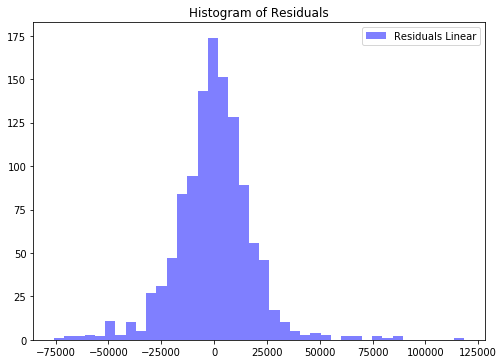

In [36]:
# 有了模型，我们现在就可以开始对我们分出来的X_test_from_train进行预测了
lr_y_predict_from_train = lr.predict(X_test_from_train)
lr_y_predict_train = lr.predict(X_train)

#在训练集上观察预测残差的分布，看是否符合模型假设：噪声为0均值的高斯噪声
f, ax = plt.subplots(figsize=(7, 5)) 
f.tight_layout() 
ax.hist(y_train - lr_y_predict_train,bins=40, label='Residuals Linear', color='b', alpha=.5); 
ax.set_title("Histogram of Residuals") 
ax.legend(loc='best');

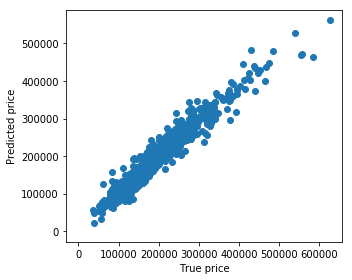

In [37]:
# 除了直方图，我们还可以观察预测值与真值的散点图
plt.figure(figsize=(5, 4))
# 横坐标为真实的数据，纵坐标为训练出的数据
plt.scatter(y_train, lr_y_predict_train)
# 数据已经标准化，3倍标准差即可
plt.plot([-3, 3], [-3, 3], '--k')
plt.axis('tight')
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.tight_layout()

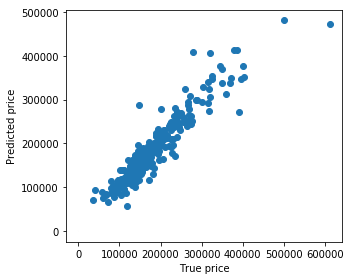

In [38]:
# 再对test_from_train作散点图
plt.figure(figsize=(5, 4))
# 横坐标为真实的数据，纵坐标为训练出的数据
plt.scatter(y_test_from_train, lr_y_predict_from_train)
plt.plot([-3, 3], [-3, 3], '--k')
plt.axis('tight')
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.tight_layout()

In [39]:
# 线性模型中还有另一种随机梯度下降优化模型参数
from sklearn.linear_model import SGDRegressor

# 使用默认配置初始化线
sgdr = SGDRegressor(max_iter=1000)

# 训练：参数估计
sgdr.fit(X_train, y_train)

# 预测
sgdr_y_predict_from_train = sgdr.predict(X_test_from_train)

In [40]:
# 使用SGDRegressor模型自带的评估模块，并输出评估结果
# 测试集的r2_score为
print('这个随机梯度下降优化模型在X_test_from_train上的得分为', sgdr.score(X_test_from_train, y_test_from_train))

# 训练集的r2_score为
print('这个随机梯度下降优化模型在X_train上的得分为', sgdr.score(X_train, y_train))

#这里由于样本数不多，SGDRegressor可能不如LinearRegression。 sklearn建议样本数超过10万采用SGDRegressor

这个随机梯度下降优化模型在X_test_from_train上的得分为 0.885502187216
这个随机梯度下降优化模型在X_train上的得分为 0.9401042509


In [41]:
# 接下来运用岭回归／L2正则来建模
# 官方手册：class sklearn.linear_model.RidgeCV(alphas=(0.1, 1.0, 10.0), fit_intercept=True, 
#                                  normalize=False, scoring=None, cv=None, gcv_mode=None, 
#                                  store_cv_values=False)
from sklearn.linear_model import  RidgeCV

# 开始用岭回归／L2正则来训练
# alphas的是取log即为横坐标
alphas = [0.01, 0.1, 1, 10,20, 40, 80,100,1000]
reg = RidgeCV(alphas=alphas, store_cv_values=True)   
reg.fit(X_train, y_train)   

RidgeCV(alphas=[0.01, 0.1, 1, 10, 20, 40, 80, 100, 1000], cv=None,
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=True)

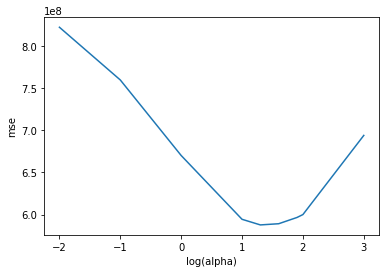

alpha is: 20.0


In [42]:
# np.mean中：
# axis=0，那么输出矩阵是1行，求每一列的平均（按照每一行去求平均）；
# axis=1，输出矩阵是1列，求每一行的平均（按照每一列去求平均）。还可以这么理解，axis是几，那就表明哪一维度被压缩成1
mse_mean = np.mean(reg.cv_values_, axis = 0)
# 横坐标是alphas取对数，纵坐标是均方差的平均值
plt.plot(np.log10(alphas), mse_mean.reshape(len(alphas),1)) 
# 这里的alpha_即为reg.fit中算出的均方误差最小的alpha值
plt.xlabel('log(alpha)')
plt.ylabel('mse')
plt.show()

print ('alpha is:', reg.alpha_)

In [43]:
# 使用RidgeCV自带的评估模块（r2_score），并输出评估结果
# 测试集的r2_score为
print('这个RidgeCV模型在X_test_from_train上的得分为', reg.score(X_test_from_train, y_test_from_train))

# 训练集的r2_score为
print('这个RidgeCV模型在X_train上的得分为', reg.score(X_train, y_train))


这个RidgeCV模型在X_test_from_train上的得分为 0.885219245536
这个RidgeCV模型在X_train上的得分为 0.932128366133


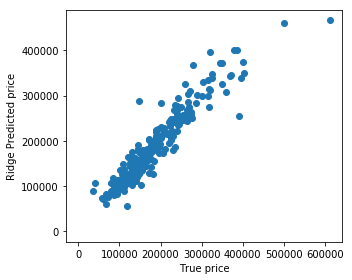

In [44]:
# 用RidgeCV模型预测预测
reg_y_predict_test_from_train = reg.predict(X_test_from_train)

plt.figure(figsize=(5, 4))
# 横坐标为真实的数据，纵坐标为训练出的数据
plt.scatter(y_test_from_train, reg_y_predict_test_from_train)
plt.plot([-3, 3], [-3, 3], '--k')
plt.axis('tight')
plt.xlabel('True price')
plt.ylabel('Ridge Predicted price')
plt.tight_layout()

In [45]:
# 我们还能通过Lasso／L1正则来建模
# 官方手册：class sklearn.linear_model.LassoCV(eps=0.001, n_alphas=100, alphas=None, fit_intercept=True, 
#                                    normalize=False, precompute=’auto’, max_iter=1000, 
#                                    tol=0.0001, copy_X=True, cv=None, verbose=False, n_jobs=1,
#                                    positive=False, random_state=None, selection=’cyclic’)
from sklearn.linear_model import LassoCV

alphas = [0.001, 0.01, 0.1, 1, 10,100,1000]

lasso = LassoCV(alphas=alphas)   
lasso.fit(X_train, y_train)      

/Users/randy/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


LassoCV(alphas=[0.001, 0.01, 0.1, 1, 10, 100, 1000], copy_X=True, cv=None,
    eps=0.001, fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=1,
    normalize=False, positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

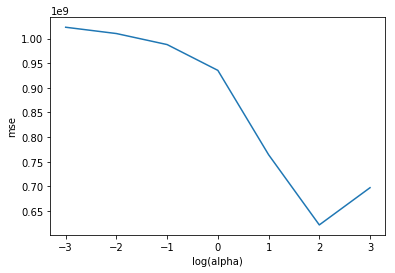

alpha is: 100.0


In [46]:
# 此处用法与解释L2岭回归类似
mses = np.mean(lasso.mse_path_, axis = 1)
plt.plot(np.log10(lasso.alphas_), mses) 
plt.xlabel('log(alpha)')
plt.ylabel('mse')
plt.show()    
            
print ('alpha is:', lasso.alpha_)

In [47]:
# 使用LassoCV自带的评估模块（r2_score），并输出评估结果
# 测试集的r2_score为
print('这个LassoCV模型在X_test_from_train上的得分为', lasso.score(X_test_from_train, y_test_from_train))

# 训练集的r2_score为
print('这个LassoCV模型在X_train上的得分为', lasso.score(X_train, y_train))

这个LassoCV模型在X_test_from_train上的得分为 0.887095242054
这个LassoCV模型在X_train上的得分为 0.931159909496


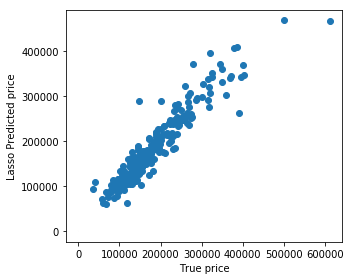

In [48]:
# 用LassoCV模型预测预测
lasso_y_predict_test_from_train = lasso.predict(X_test_from_train)

plt.figure(figsize=(5, 4))
# 横坐标为真实的数据，纵坐标为训练出的数据
plt.scatter(y_test_from_train, lasso_y_predict_test_from_train)
plt.plot([-3, 3], [-3, 3], '--k')
plt.axis('tight')
plt.xlabel('True price')
plt.ylabel('Lasso Predicted price')
plt.tight_layout()

In [49]:
# 汇总所有的模型

# 线性回归模型：
## 这个线性回归模型在X_test_from_train上的得分为 0.882983458261
## 这个线性回归模型在X_train上的得分为 0.942995000253

# 随机梯度下降优化模型:
## 这个随机梯度下降优化模型在X_test_from_train上的得分为 0.880863954539
## 这个随机梯度下降优化模型在X_train上的得分为 0.939545348544

# L2岭回归模型：
## 这个RidgeCV模型在X_test_from_train上的得分为 0.885219245536
## 这个RidgeCV模型在X_train上的得分为 0.932128366133

# L1Lasso回归模型：
## 这个LassoCV模型在X_test_from_train上的得分为 0.887095242054
## 这个LassoCV模型在X_train上的得分为 0.931159909496

# 可得出对此数据集最好的模型为线性回归模型

In [50]:
# 得出结论后，利用线性回归模型得出预测值，并将SalePrice写入CSV文件当中
# 现在开始用上真正的test数据集啦
# 通过train完整数据集训练模型

# 使用默认配置初始化
lr_train = LinearRegression()

# 训练模型参数
lr_train.fit(train_X, train_y)

# 使用LinearRegression模型自带的评估模块（r2_score），并输出对lr的评估结果

# 训练集的r2_score为
print('这个线性回归模型在train_X上的得分为', lr_train.score(train_X, train_y))

这个线性回归模型在train_X上的得分为 0.936170141891


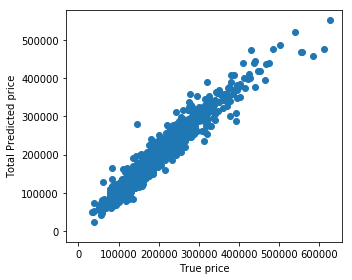

In [51]:
# 保险起见还是看一下预测值与真值的散点图
lr_train_y_predict_train = lr_train.predict(train_X)

plt.figure(figsize=(5, 4))
# 横坐标为真实的数据，纵坐标为训练出的数据
plt.scatter(train_y, lr_train_y_predict_train)
plt.plot([-3, 3], [-3, 3], '--k')
plt.axis('tight')
plt.xlabel('True price')
plt.ylabel('Total Predicted price')
plt.tight_layout()

In [52]:
# 先将FE_test中的id列去掉
test_X = FE_test.drop('Id', axis = 1)

test_X.describe()
#确认了test已经分离了Id列

,0,1,2,3,4,5,6,7,8,9,...,333,334,335,336,337,338,339,340,341,342
count,1459.000,1459.000,1459.000,1459.000,1459.000,1459.000,1459.000,1459.000,1459.000,1459.000,...,1459.000,1459.000,1459.000,1459.000,1459.000,1459.000,1459.000,1459.000,1459.000,1459.000
mean,0.020,-0.061,-0.011,0.021,0.025,0.026,0.061,-0.027,-0.046,0.006,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
std,0.955,0.503,1.093,1.002,0.964,0.000,0.789,1.013,0.984,1.007,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
min,-1.694,-0.909,-17.012,-0.244,-4.482,0.026,-7.028,-2.648,-2.695,-3.053,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
25%,-0.391,-0.308,0.059,-0.244,-1.026,0.026,0.225,-0.696,-0.420,-0.602,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
50%,0.171,-0.104,0.059,-0.244,0.702,0.026,0.225,-0.696,-0.420,0.061,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
75%,0.615,0.111,0.059,-0.244,0.702,0.026,0.225,1.255,-0.420,0.988,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
max,4.225,4.687,0.059,5.118,0.702,0.026,0.225,1.255,1.855,1.286,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [53]:
# 最后最后最后最后最后我们来预测test数据集
lr_test_y_predict = lr_train.predict(test_X)

# 将完成的数据集放入dataframe中
finall_predict = pd.DataFrame({"SalePrice" : lr_test_y_predict, 
             "Id" : test_id})


# 确认是否成功初始化dataframe
finall_predict.head(5)

,Id,SalePrice
0,1461,115036.969
1,1462,154758.155
2,1463,188078.595
3,1464,188606.690
4,1465,216151.025


In [54]:
# 最后将最终预测值写入csv中
finall_predict.to_csv('AmesHouse_Finall_Predict.csv', index=False)